In [29]:
import pandas as pd
import time
import numpy as np
import struct
import matplotlib.pyplot as plt
from cr_data_inspection_functions import *


## This notebook demonstrates how to work with LWA Cosmic Ray data, using April 8 as an example.

In this data set, a trigger signal was sent from software once per minute to trigger the SNAP2 boards to read out the cosmic ray buffer. It ran for about 5 hours.

Every file contains binary data from a series of packets. Each packet transmitted from an FPGA contains a 20 microsecond timeseries for one antenna, along with some metadata including the antenna id, a timestamp, and system settings. The parsefile function returns a list of dictionaries, one dictionary per packet. The timeseries is under the 'data' key, and the other keys correspond to the other metadata.  To identify which antenna a timeseries came from, use the FPGA id and the antenna id together. Casey's library makes it easy to look up antennas given the FPGA and the antenna index within that FPGA. TODO install that library on delphinium.  

Note about this test data: The timestamp in the packets is broken, so I set the data receiving script to write a new file once per minute. The trigger signal is sent once per minute, so there should be one snapshot (704 packets) per file except for possible occasional edge cases.  The timestamp in the filename gives a rough estimate of the time the data was taken.

In [32]:
# read the data
datadir='/home/kp/data/April8_24hourdata/April8_24hourdata/'
filelist='/home/kp/data/April8_24hourdata/April8_24hourdata_ls.txt'

with open(filelist) as f:
    fnames_raw=f.readlines()
fnames=[f[:-1] for f in fnames_raw]


records=[]
for fname in fnames[:10]:  #just the first 10 for now
    new_records=parsefile(datadir+fname)
    for r in new_records:
        r['fname']=fname
    records=records+new_records

File contains  704  packets
File contains  704  packets
File contains  0  packets
File contains  704  packets
File contains  704  packets
File contains  704  packets
File contains  704  packets
File contains  704  packets
File contains  704  packets
File contains  704  packets


Text(0.5, 0, 'Time [clock cycles]')

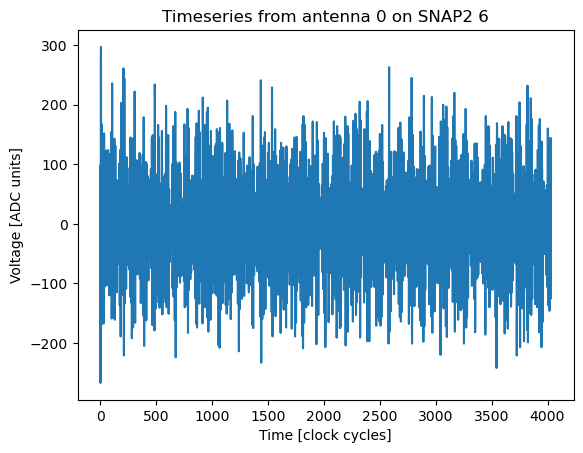

In [33]:
#plot the first timeseries
first_timeseries=records[0]['data']
fpga_id=records[0]['board_id']
antenna=records[0]['antenna_id']
plt.plot(first_timeseries)
plt.title('Timeseries from antenna '+str(antenna)+' on SNAP2 '+ str(fpga_id))
plt.ylabel('Voltage [ADC units]')
plt.xlabel('Time [clock cycles]')